In [1]:
# Simple example of integrating the hydrogen wavefunction

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from numerov.rydberg import RydbergState

In [3]:
hydrogen = RydbergState("H", n=3, l=1, j=1.5, steps=100)

In [4]:
z_list, w_list = hydrogen.integrate()

x_list = np.power(z_list, 2)
u_list = np.sqrt(z_list) * w_list

In [5]:
from sympy.abc import r as sympy_r
from sympy.physics import hydrogen as sympy_hydrogen
from sympy.utilities.lambdify import lambdify

R_nl = lambdify(sympy_r, sympy_hydrogen.R_nl(hydrogen.n, hydrogen.l, sympy_r, Z=1))
u_list_symyp = R_nl(x_list) * x_list
w_list_symyp = u_list_symyp / np.sqrt(z_list)

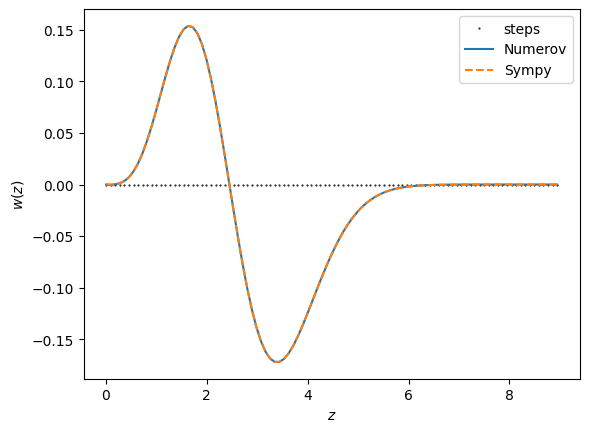

In [6]:
plt.plot(z_list, np.zeros_like(z_list), c="k", marker=".", ms=1, ls="None", label="steps")
plt.plot(z_list, w_list, "C0-", label="Numerov")
plt.plot(z_list, w_list_symyp, "C1--", label="Sympy")
plt.xlabel(r"$z$")
plt.ylabel(r"$w(z)$")
plt.legend()

plt.show()

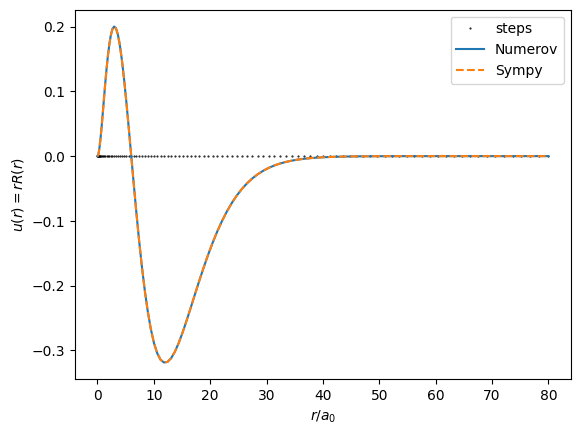

In [7]:
plt.plot(x_list, np.zeros_like(x_list), c="k", marker=".", ms=1, ls="None", label="steps")
plt.plot(x_list, u_list, "C0-", label="Numerov")
plt.plot(x_list, u_list_symyp, "C1--", label="Sympy")
plt.xlabel(r"$r / a_0$")
plt.ylabel(r"$u(r) = r R(r)$")
plt.legend()

plt.show()